In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore');

In [2]:
all_data = pd.read_csv('./only_frankfurt.csv', delimiter=',')

In [3]:
all_data.head()

,Unnamed: 0,BOOKING_HAL_ID,EFFECTIVE_CATEGORY_HAL_ID,VEHICLE_HAL_ID,VEHICLE_HAL_SRC,RENTAL_OBJECT_HAL_ID,RENTAL_OBJECT_HAL_SRC,VEHICLE_COMPANY_HAL_ID,DUTY_TRIP_X,CUSTOMER_HAL_ID,...,FRAME_BOOKING_HAL_ID,START_RENTAL_ZONE,START_RENTAL_ZONE_GROUP,END_RENTAL_ZONE,END_RENTAL_ZONE_GROUP,CITY_RENTAL_ZONE,ACTUAL_VEHICLE_CATEGORY,BOOKING_LENGTH_CLASSIFICATION,TECHNICAL_USER_NAME,TECHNICAL_USER_NAME_LONG
0,0,23161966,50000,116335,cab_fahrrad,363130,autopos,500,1,AABCDA9CD1FDDD1A819B2C68F6F05C678EC9E918,...,NaN,Pfarrer-Perabo-Platz / Kleyerstraße,Pfarrer-Perabo-Platz / Kleyerstraße,NaN,NaN,Frankfurt am Main,Fahrrad,4) 60 bis 120 Minuten,NaN,NaN
1,3,23162025,50000,116424,cab_fahrrad,381903,autopos,500,1,AABCDA9CD1FDDD1A819B2C68F6F05C678EC9E918,...,NaN,Industriehof,Industriehof,NaN,NaN,Frankfurt am Main,Fahrrad,5) 120 bis 180 Minuten,NaN,NaN
2,16,22624449,50000,116493,cab_fahrrad,384528,autopos,500,0,DF380E61BFD8496818D355402053EB10476304CF,...,NaN,NaN,NaN,Nibelungenplatz / Nibelungen Allee,Nibelungenplatz / Nibelungen Allee,Frankfurt am Main,Fahrrad,5) 120 bis 180 Minuten,NaN,NaN
3,28,23161904,50000,117262,cab_fahrrad,397394,autopos,500,0,30848C833E874239FF088C39A527558B3DBDE2E8,...,NaN,Europaallee / Den Haager Straße,Europaallee / Den Haager Straße,NaN,NaN,Frankfurt am Main,Fahrrad,1) 0 bis 15 Minuten,t,IVR
4,34,23161562,50000,116188,cab_fahrrad,393546,autopos,500,0,B9951AE1E818A5215F08307C179FF16CF984757B,...,NaN,Frankenallee / Schwalbacherstraße,Frankenallee / Schwalbacherstraße,Voltastraße / An der Dammheide,Voltastraße / An der Dammheide,Frankfurt am Main,Fahrrad,1) 0 bis 15 Minuten,Schnittstelle,iPhone CAB


In [4]:
twocols = all_data[['BOOKING_HAL_ID', 'DATE_BOOKING']]

In [5]:
twocols.head()

,BOOKING_HAL_ID,DATE_BOOKING
0,23161966,2014-05-13 09:04:25.0000000
1,23162025,2014-05-13 09:06:26.0000000
2,22624449,2014-04-13 14:51:52.0000000
3,23161904,2014-05-13 09:01:53.0000000
4,23161562,2014-05-13 08:49:22.0000000


In [6]:
newcols = pd.DataFrame(twocols["DATE_BOOKING"].str.split(" ", 1).tolist(), columns = ['date','time'])

In [7]:
newcols.head()

,date,time
0,2014-05-13,09:04:25.0000000
1,2014-05-13,09:06:26.0000000
2,2014-04-13,14:51:52.0000000
3,2014-05-13,09:01:53.0000000
4,2014-05-13,08:49:22.0000000


In [8]:
splitted_date = pd.DataFrame(newcols["date"].str.split("-", 2).tolist(), columns = ['year', 'month', 'day'])
## cut the date in certain features

In [9]:
splitted_date.head()

,year,month,day
0,2014,05,13
1,2014,05,13
2,2014,04,13
3,2014,05,13
4,2014,05,13


Text(0.5, 1.0, 'Booking_Activity_per_Month')

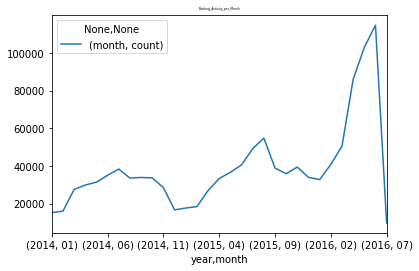

In [14]:
splitted_date.groupby(['year', 'month']).agg({'month': ['count']}).plot()
plt.title('Booking_Number_per_Month')
##shows number of bookings per month

Text(0.5, 1.0, 'Booking_Number_per_Year')

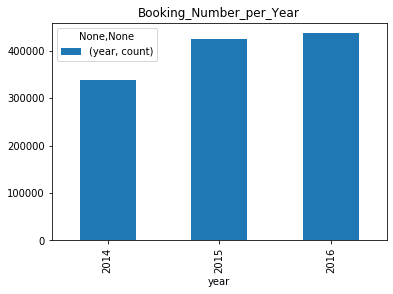

In [15]:
splitted_date.groupby(['year']).agg({'year': ['count']}).plot(kind='bar')
plt.title('Booking_Number_per_Year')
##shows number of bookings per year

In [17]:
Booking_Length = all_data[['BOOKING_HAL_ID', 'DATE_BOOKING', 'DATE_FROM', 'DATE_UNTIL', 'BOOKING_LENGTH_CLASSIFICATION']]

In [18]:
Booking_Length.head()
#another dataset from all with selected features

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION
0,23161966,2014-05-13 09:04:25.0000000,2014-05-13 09:04:25.0000000,2014-05-13 10:34:52.0000000,4) 60 bis 120 Minuten
1,23162025,2014-05-13 09:06:26.0000000,2014-05-13 09:06:26.0000000,2014-05-13 11:58:02.0000000,5) 120 bis 180 Minuten
2,22624449,2014-04-13 14:51:52.0000000,2014-04-13 14:51:52.0000000,2014-04-13 17:38:50.0000000,5) 120 bis 180 Minuten
3,23161904,2014-05-13 09:01:53.0000000,2014-05-13 09:01:53.0000000,2014-05-13 09:02:28.0000000,1) 0 bis 15 Minuten
4,23161562,2014-05-13 08:49:22.0000000,2014-05-13 08:49:22.0000000,2014-05-13 08:58:00.0000000,1) 0 bis 15 Minuten


In [19]:
Booking_Length['DATE_BOOKING'] = pd.DataFrame(Booking_Length["DATE_BOOKING"].str.split(" ", 1).tolist(), columns = ['date', 'time'])
Booking_Length.head()
#cut Booking time from Date_Booking by splitting the attribute


,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION
0,23161966,2014-05-13,2014-05-13 09:04:25.0000000,2014-05-13 10:34:52.0000000,4) 60 bis 120 Minuten
1,23162025,2014-05-13,2014-05-13 09:06:26.0000000,2014-05-13 11:58:02.0000000,5) 120 bis 180 Minuten
2,22624449,2014-04-13,2014-04-13 14:51:52.0000000,2014-04-13 17:38:50.0000000,5) 120 bis 180 Minuten
3,23161904,2014-05-13,2014-05-13 09:01:53.0000000,2014-05-13 09:02:28.0000000,1) 0 bis 15 Minuten
4,23161562,2014-05-13,2014-05-13 08:49:22.0000000,2014-05-13 08:58:00.0000000,1) 0 bis 15 Minuten


In [21]:
Booking_Length['DATE_FROM'] = pd.to_datetime(Booking_Length['DATE_FROM']) 
Booking_Length['DATE_UNTIL'] = pd.to_datetime(Booking_Length['DATE_UNTIL'])
Booking_Length['BOOKING_TIME'] = Booking_Length['DATE_UNTIL'] - Booking_Length['DATE_FROM']
Booking_Length.head()
#create new column and add it to dataset with the absolute Bookingtime

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION,BOOKING_TIME
0,23161966,2014-05-13,2014-05-13 09:04:25,2014-05-13 10:34:52,4) 60 bis 120 Minuten,01:30:27
1,23162025,2014-05-13,2014-05-13 09:06:26,2014-05-13 11:58:02,5) 120 bis 180 Minuten,02:51:36
2,22624449,2014-04-13,2014-04-13 14:51:52,2014-04-13 17:38:50,5) 120 bis 180 Minuten,02:46:58
3,23161904,2014-05-13,2014-05-13 09:01:53,2014-05-13 09:02:28,1) 0 bis 15 Minuten,00:00:35
4,23161562,2014-05-13,2014-05-13 08:49:22,2014-05-13 08:58:00,1) 0 bis 15 Minuten,00:08:38


In [22]:
date_split = pd.DataFrame(Booking_Length["DATE_BOOKING"].str.split("-",2).tolist(), columns = ['year','month', 'day'])
Booking_Length['BOOKING_YEAR'] = date_split['year']
Booking_Length['BOOKING_MONTH'] = date_split['month']
#create new columns by splitting datebooking and caching in date_split

In [23]:
Booking_Length.head()

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION,BOOKING_TIME,BOOKING_YEAR,BOOKING_MONTH
0,23161966,2014-05-13,2014-05-13 09:04:25,2014-05-13 10:34:52,4) 60 bis 120 Minuten,01:30:27,2014,05
1,23162025,2014-05-13,2014-05-13 09:06:26,2014-05-13 11:58:02,5) 120 bis 180 Minuten,02:51:36,2014,05
2,22624449,2014-04-13,2014-04-13 14:51:52,2014-04-13 17:38:50,5) 120 bis 180 Minuten,02:46:58,2014,04
3,23161904,2014-05-13,2014-05-13 09:01:53,2014-05-13 09:02:28,1) 0 bis 15 Minuten,00:00:35,2014,05
4,23161562,2014-05-13,2014-05-13 08:49:22,2014-05-13 08:58:00,1) 0 bis 15 Minuten,00:08:38,2014,05


Text(0.5, 1.0, 'Summarized Booking_Time_per_month')

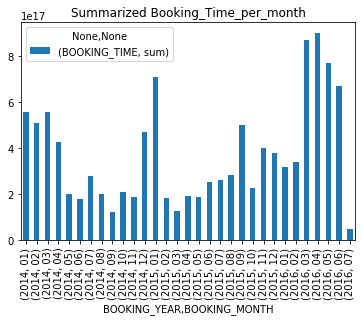

In [24]:
Booking_Length.groupby(['BOOKING_YEAR','BOOKING_MONTH']).agg({'BOOKING_TIME': ['sum']}).plot(kind='bar')
plt.title('Summarized_Booking_Time_per_month')

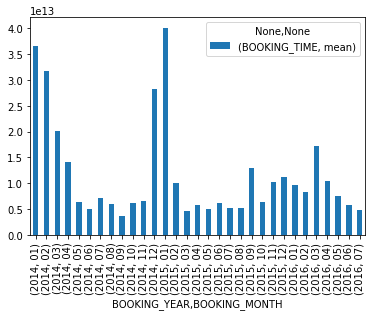

In [25]:
Booking_Length['BOOKING_TIME'] = Booking_Length['BOOKING_TIME'].values.astype(np.int64)
Booking_Length.groupby(['BOOKING_YEAR','BOOKING_MONTH']).agg({'BOOKING_TIME': ['mean']}).plot(kind='bar')
plt.title('Average_Booking_Time_per_Month')

Text(0.5, 1.0, 'Booking_Time_divided_in_Timeseries')

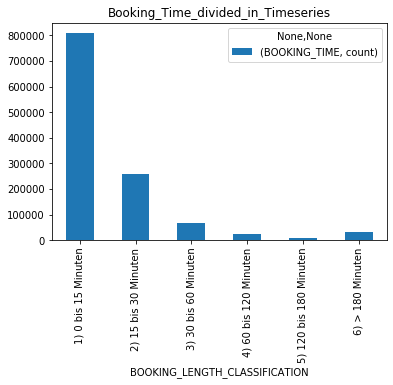

In [26]:
Booking_Length.groupby(['BOOKING_LENGTH_CLASSIFICATION']).agg({'BOOKING_TIME': ['count']}).plot(kind='bar')
plt.title('Booking_Time_divided_in_Timeseries')
#Bookingtimes for each BookingEntity is assigned to certain Timeseries 

In [27]:
Booking_Length['DATE_BOOKING'] = pd.DataFrame(Booking_Length["DATE_BOOKING"].str.split("-", 2).tolist(), columns = ['date', 'time', 'day'])
Booking_Length.head()

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION,BOOKING_TIME,BOOKING_YEAR,BOOKING_MONTH
0,23161966,2014,2014-05-13 09:04:25,2014-05-13 10:34:52,4) 60 bis 120 Minuten,5427000000000,2014,05
1,23162025,2014,2014-05-13 09:06:26,2014-05-13 11:58:02,5) 120 bis 180 Minuten,10296000000000,2014,05
2,22624449,2014,2014-04-13 14:51:52,2014-04-13 17:38:50,5) 120 bis 180 Minuten,10018000000000,2014,04
3,23161904,2014,2014-05-13 09:01:53,2014-05-13 09:02:28,1) 0 bis 15 Minuten,35000000000,2014,05
4,23161562,2014,2014-05-13 08:49:22,2014-05-13 08:58:00,1) 0 bis 15 Minuten,518000000000,2014,05


Text(0.5, 1.0, 'Absolut_Booking_Time_per_Year')

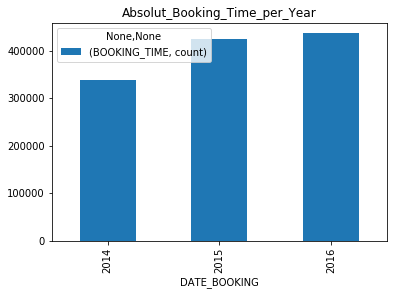

In [31]:
Booking_Length.groupby(['DATE_BOOKING']).agg({'BOOKING_TIME': ['count']}).plot(kind='bar')
plt.title('Absolut_Booking_Time_per_Year')

In [32]:
Booking_Length['DATE_FROM'] = pd.to_datetime(Booking_Length['DATE_FROM']) 
Booking_Length['DATE_BOOKING'] = pd.to_datetime(Booking_Length['DATE_BOOKING'])
Booking_Length['BOOKING_Month'] = Booking_Length['DATE_FROM'] - Booking_Length['DATE_BOOKING']
Booking_Length.head()
# nicht berücksichtigen!

,BOOKING_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,BOOKING_LENGTH_CLASSIFICATION,BOOKING_TIME,BOOKING_YEAR,BOOKING_MONTH,BOOKING_Month
0,23161966,2014-01-01,2014-05-13 09:04:25,2014-05-13 10:34:52,4) 60 bis 120 Minuten,5427000000000,2014,05,132 days 09:04:25
1,23162025,2014-01-01,2014-05-13 09:06:26,2014-05-13 11:58:02,5) 120 bis 180 Minuten,10296000000000,2014,05,132 days 09:06:26
2,22624449,2014-01-01,2014-04-13 14:51:52,2014-04-13 17:38:50,5) 120 bis 180 Minuten,10018000000000,2014,04,102 days 14:51:52
3,23161904,2014-01-01,2014-05-13 09:01:53,2014-05-13 09:02:28,1) 0 bis 15 Minuten,35000000000,2014,05,132 days 09:01:53
4,23161562,2014-01-01,2014-05-13 08:49:22,2014-05-13 08:58:00,1) 0 bis 15 Minuten,518000000000,2014,05,132 days 08:49:22


In [33]:
rentalzone = all_data[['START_RENTAL_ZONE', 'END_RENTAL_ZONE']]

In [34]:
rentalzone.head()

,START_RENTAL_ZONE,END_RENTAL_ZONE
0,Pfarrer-Perabo-Platz / Kleyerstraße,NaN
1,Industriehof,NaN
2,NaN,Nibelungenplatz / Nibelungen Allee
3,Europaallee / Den Haager Straße,NaN
4,Frankenallee / Schwalbacherstraße,Voltastraße / An der Dammheide


In [38]:
rentalzone.groupby(rentalzone['START_RENTAL_ZONE'].dt.weekday_name).size()
#ax = rentalzone.plot.scatter

AttributeError: Can only use .dt accessor with datetimelike values

AttributeError: 'AxesSubplot' object has no attribute 'head'

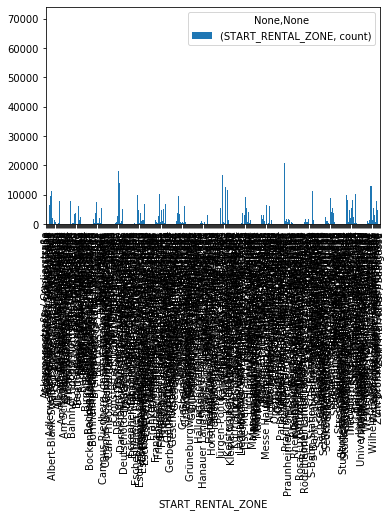

In [35]:
rentalzone.groupby(['START_RENTAL_ZONE']).agg({'START_RENTAL_ZONE': ['count']}).plot(kind='bar').head()
#Which Rental Zone is used most often?